<a name="top"></a>

<div style="width:1000 px">

<div style="float:right; width:300 px"><img src="https://github.com/brianmapes/ATM407/blob/master/images/LMT_5.4.png?raw=true" alt="Heating tendencies LMT_5.4 exercise image" style="height: 200px;"></div>


<h1>Assignment 8: Heating rates in a midlatitude cyclone</h1>
<h3>ATM 407, University of Miami</h3>

* To use these Jupyter notebooks, you need to have installed all this:  
https://brianmapes.github.io/EarthCube-DRILSDOWN/ )


### Activities
1. <a href="#Exercise1">Some math about it</a>
1. <a href="#Exercise2">Load an IDV bundle</a>
1. <a href="#Exercise3">Answer the book's LMT_5.4 questions</a>
1. <a href="#Exercise4">Use LMT_5.4_MERRA_1979-2015 to make the same bundle for YOUR case.</a>
1. <a href="#Exercise5">Answer the mose interesting part for YOUR case.</a>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Background
Remember, for the test you will memorize and write the primitive equations:
1. Horizontal acceleration equation (F=ma):
$$ \frac{d}{dt} \vec V_h = f \vec V_h \times \hat k  - \vec \nabla_p \Phi +\vec F_r  $$
or, in component form, 
$$ \frac{du}{dt} = fv  - \frac{\partial \Phi}{\partial x} +F_{rx} $$
$$ \frac{dv}{dt} = -fu - \frac{\partial \Phi}{\partial y} +F_{ry} $$

1. Vertical acceleration equation (aka Hydrostatic balance): 
$$ \frac {\partial \Phi}{\partial p} = - \alpha \equiv -\frac{1}{\rho} = \frac{RT}{p} = \frac{R\theta}{p} (\frac{T}{\theta})$$
1. Mass continuity: 
$$ 0 = \frac {\partial u}{\partial x} + \frac {\partial v}{\partial y}  + \frac {\partial \omega}{\partial p} $$
1. First Law of thermodynamics: 
$$ \frac {d \theta}{dt} = Q_\theta $$ 
where $Q_\theta$, the heating rate in $\theta$ units, is related to dT/dt_{diabatic} = Q (in W/kg units) by:  
$$ Q_\theta = Q/C_p\frac{\theta}{T} $$


#### For this exercise, let's focus on the First Law in the form used by atmosphere models (Eulerian grids). 

$$ \frac {\partial \theta}{\partial t} = -V \cdot \nabla \theta + Q_\theta  = Q_{dyn} + Q_{phys}$$ 

Or, more to the point for digital atmospheric models with a finite timestep dt, 

$$ \theta_{future}(x,y,p) = \theta_{present} + dt \frac{(Q_{dyn} + Q_{phys} )} {C_p} \frac{\theta}{T}$$ 

Save room in your brain for the concept of $Q_{ana}$, the *analysis tendency*, which is *the tendency required to make a model evolve in time as the world was observed to evolve in time.* (That is, *the sum of all errors in model estimates of Q{phys} and Q_{dyn} from all its derivatives and combinations of its state variables).  

<hr style="height:2px;">

<a name="Exercise1"></a> 
<div class="alert alert-success">
    <b>EXERCISE 1</b>:
     <ul>

<li>**What is $\frac{\theta}{T}$ in the above casting of the equations? ** Show that it involves only the coordinate variable $p$.</li>

<li>We can express $Q$ into the 3 physical forms of heat transfer (from fundamental physics): *radiation, conduction, convection, and chemical reaction.*</li>

$$Q_{phys} = Q_{rad} +  Q_{surface} + Q_{turb} + Q_{chem}$$

<li>**Explain in words how these map onto the column heating physics in atmosphere model:**</li>

$$Q_{phys} = Q_{LW} +  Q_{SW} + Q_{SHF} + Q_{PBL \ diffusion} +Q_{gridscale \ cond-evap} + Q_{subgrid \ cumulus \ convection} +Q_{frictional \ dissipation}$$

<li>**Explain how the profile of longwave radiation $Q_{LW}$ relates to the profile of cloudiness.**</li>

    </ul>
</div>

## Exercise 1 Answer: 
### First question bullet: 

$\frac{\theta}{T} = \theta_{future} - \theta_{present}(\frac{C_p}{(Q_{dyn} + Q_{phy})}) = \frac{d\theta}{dt}\frac{C_p}{(Q_{dyn} + Q_{phy})}$


### Second question (third bullet): 
1. Q_LW is purely **radiative** (LW="longwave", the infrared radiation emitted by parts of the Earth system). 
2. Q_SW is purely radiative (SW = "shortwave", the UV radiation emitted by the sun to the Earth). 
3. Q_SHF is the heat flux between the surface (usually warmer) and the air interacting with it. 
4. Q_PBL is purely **turbulent** (heat transfer from one altitude to another carried by small or "subgrid" parcels of air).
5. Q_cond is either from frictional heating or from heat flux at the surface. 
6. Q_cumulus is a mix of Q_LW and Q_SW (shortwave radiation from the sun is absorbed at the cloud top and longwave is absorbed at the cloud base).
7. Q_friction is arguably a version of **"conduction"**, as the kinetic energy of the wind gets turned into heat by the **physical contact** of molecules from micro-airmasses with different velocities. 

### Third question (fourth bullet): 

Longwave heaing Q_LW is positive where more infrared photons arrive than leave. It is negative wherever more IR photons leave than arrive. Cloud effects can be understood using the concept that solid surfaces (both the Earth and cloud top and bottom) absorb all photons that strike them (no reflection), and emit more or less according to their local temperature as $\sigma T^4$. Since temperature T decreases with height in the troposphere, more emission would occur at the warmer cloud base than at the cooler cloud top. Q_LW would be positive at the cloud base where more infrared photons are coming to the base from re-emission by Earth's surface than are being re-emitted back to the surface from the base. At the cloud top, Q_SW dominates and less emission occurs due to the lower temperautre, so Q_LW is negative there. 


<hr style="height:2px;">
<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Exercise2"></a> 
## Exercise 2: Find and load the LMT_5.4 bundle. Capture the storm image. 

<div class="alert alert-info">
    <b>Note</b>:
     (If you like, you could do the Sandy version I made yesterday as a test, but it is bigger and slower to load.)
</div>

In [3]:
%reload_ext drilsdown


A Jupyter Widget

tempfile.tempdir = None
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


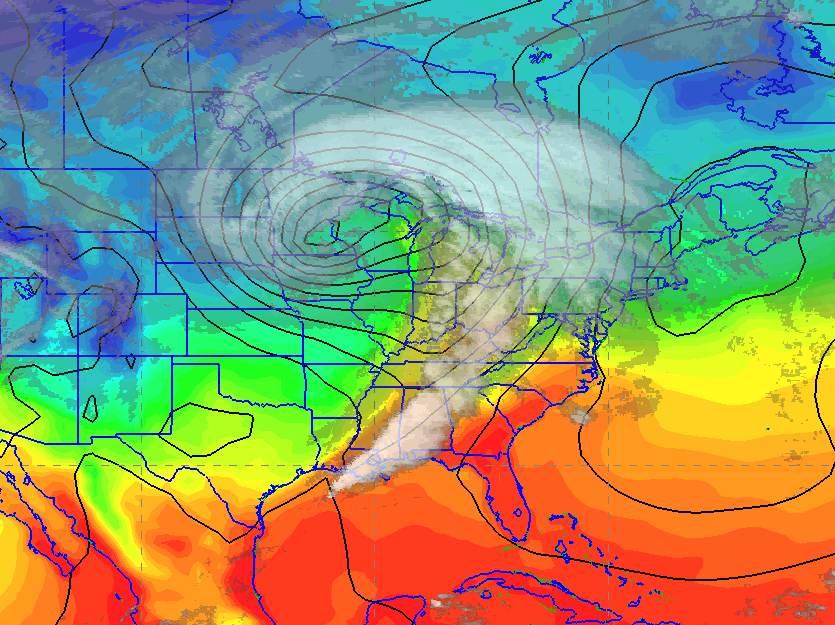

In [3]:
# Your image 
%makeImage

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Exercise3"></a> 
<div class="alert alert-success">
    <b>EXERCISE 3</b>:
     <ul>
      <li>**Answer the LMT_5.4 questions a-k, using image captures and Markdown cells to make this notebook a readable document you are proud of.**
      
      </li>
      
       <li>To do this, **copy the boldface question for each part from the text**, and then write your answers in normal text, so that a reader of this notebook gets a coherent narrative.
      
      </li>
      
    </ul>
</div>

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


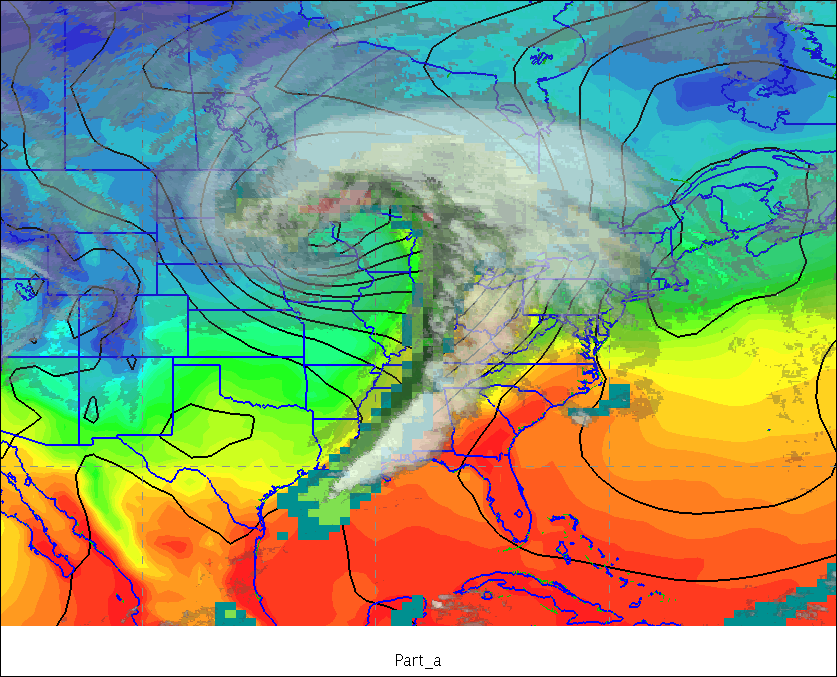

In [4]:
%makeImage -caption Part_a

## Markdown answer for a): 


**a) Are the position of the cyclone and its fronts fairly well analyzed in the model fields? Does the model’s rainfall (and condensation heating) match what you would infer from the satellite imagery? Capture an image indicating a discrepancy between the satellite observations and the model’s depiction of the storm. What is your assessment of the general quality of the analysis?** 

The locations of expected warm and cold fronts coming from the low pressure are well represented by the temperature field depicted above. A cold air mass to the west of the low can be seen moving towards the southeast, and a warm air mass to the east of the low can be seen moving towards the northeast. 

Based on this analysis of the fronts, cloud formation would be heaviest to the north and northeast of the low pressure center, which correlates well with the clouds and precipitation displayed by the IR satellite imagery and the total precipitation produced by the model's convection and cloud schemes. These two displays are not perfectly in line with one another, with the model's schemes predicting precipitation farther south than the true IR satellite display conveys. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


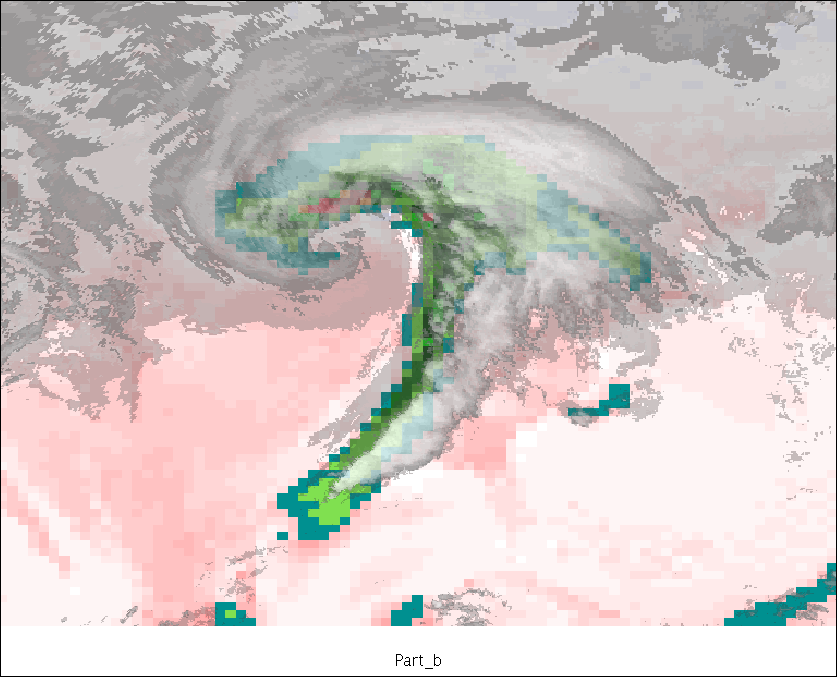

In [5]:
%makeImage -caption Part_b

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


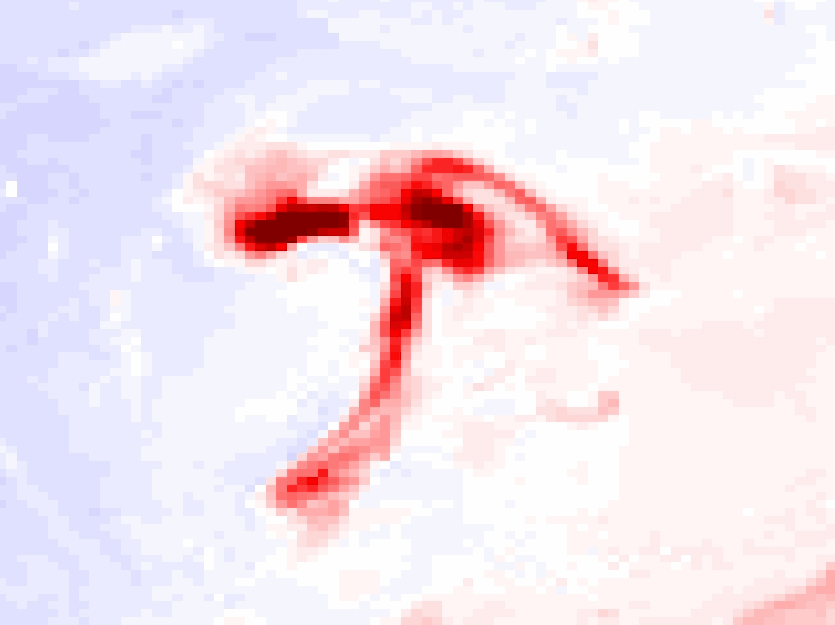

In [7]:
%makeMovie -caption Part_b_dthdt_phy

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


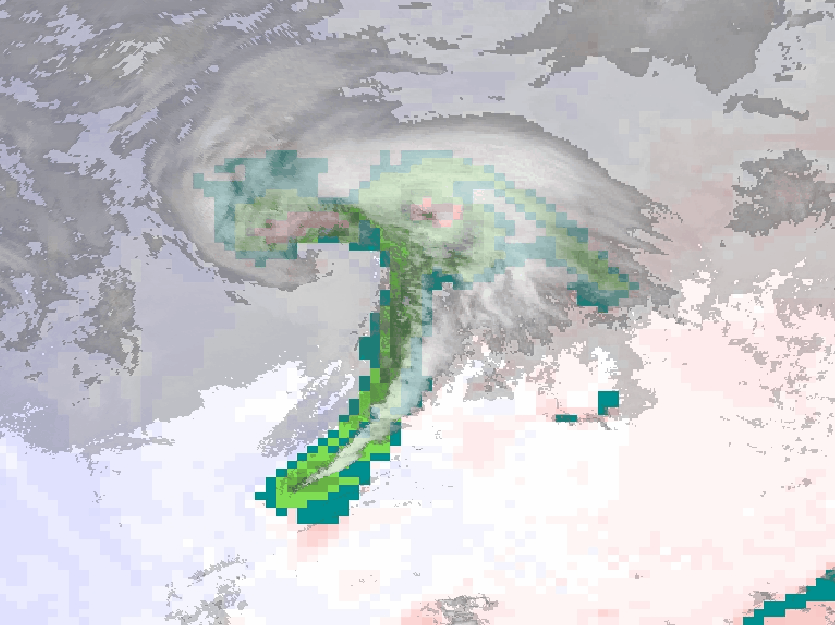

In [6]:
%makeMovie -caption Part_b

## Markdown answer for b): Do some features in these displays correspond to each other? Which category of physical heating corresponds to MERRA’s prectot? 
## What main differences do you see in non-precipitating regions?


The MERRA's prectot and display of physical heating rate correspond very well to one another, with the precipitation produced by MERRA corresponding to positive physical heating. 

Physical heating here represents the sum of: radiative heating (short and longwave), heating from moist processes, turbulent heating and frictional heating. 

The column integrated physical heating rate, shown on its own in the first animation, changes from negative in non-precipitating regions at 1500UTC to positive in these same regions at 1800UTC. These changes in time correspond to going from 9am to 12pm in the regions depicted. This suggests the change in heating could be the difference between the regions following a night of no sunlight and the same regions at noon, when the sun has been present for several hours and is reaching it's highest heating rate for the day. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


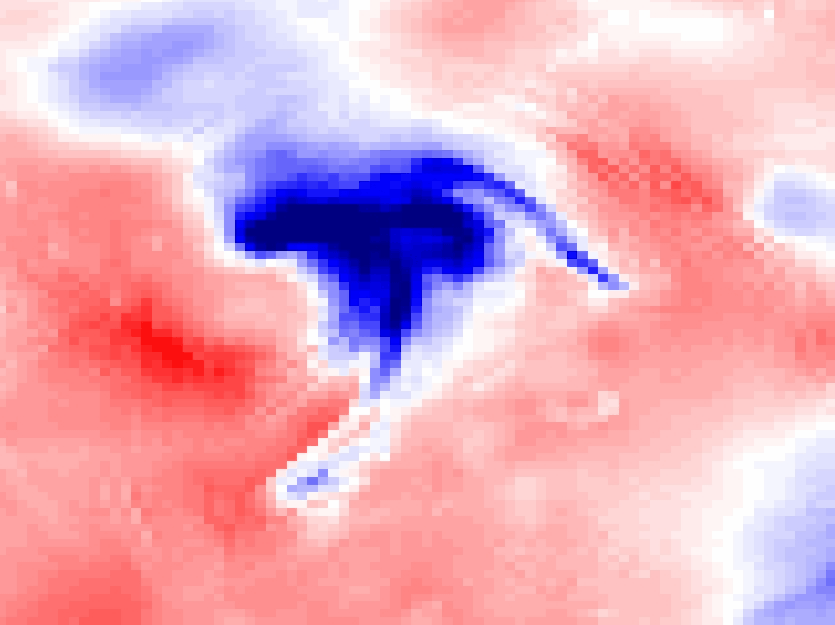

In [9]:
%makeMovie -caption Dynamical_tendency

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


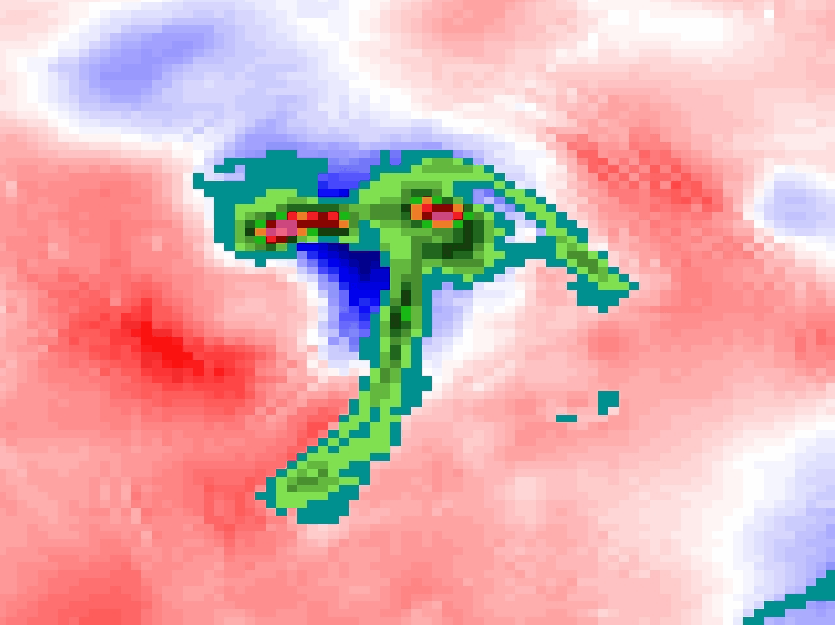

In [10]:
%makeMovie -caption MERRA_and_Dynamical_tendency

## Markdown answer for c): Does the dynamical tendency also have features that correspond to the pattern of MERRA’s prectot? Explain.

For the Dynamical tendency, contrary to the physical heating rate above, METTA's precipitation totals correspond to negative values of dynamic advection. However, the area of negative dynamical advection still matches MERRA's precipitation predictions like the physical heating rate above. 

Dynamical tendency is the sum of advection by the wind fields in the horizontal and vertical directions. Based on the correlation with the predicted precipitation patterns, a negative dynamical tendency is connected to processes that encourage convergence of surface winds in the vertical and rising motion.   

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


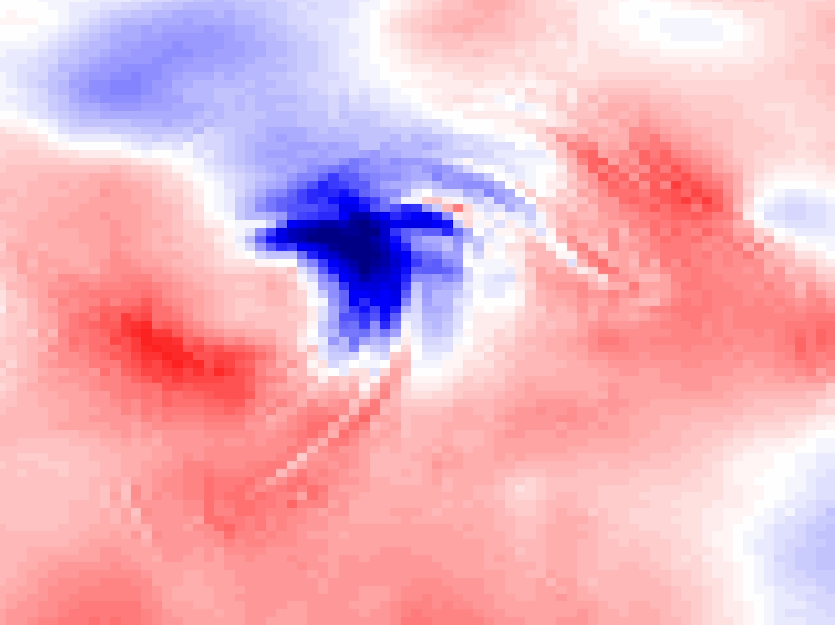

In [11]:
%makeMovie -caption Part_d

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


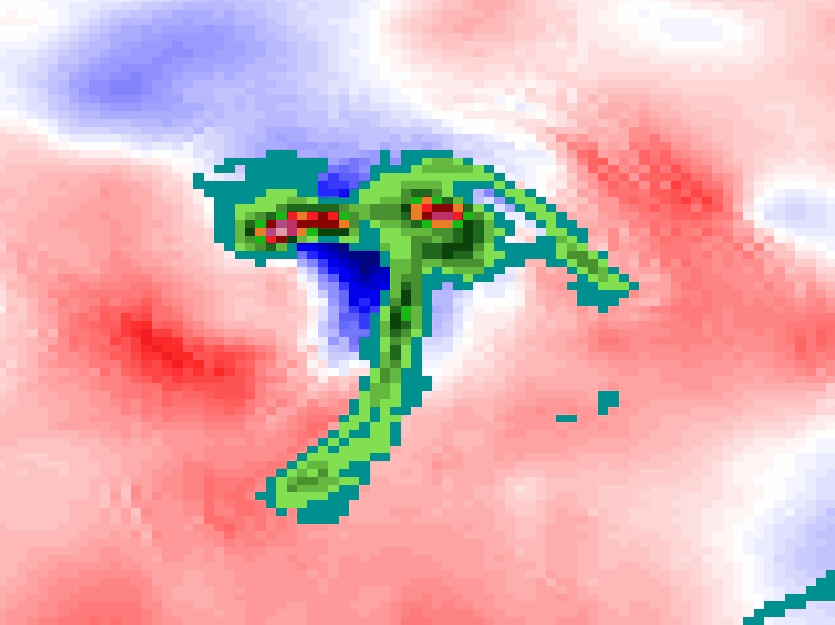

In [12]:
%makeMovie -caption Part_d_and_MERRA_pretot

## Markdown answer for d): Does this field have much correspondence with MERRA’s prectot? Why or why not, in light of c) above? Loop between the two time steps. Using this logic, do the features in the net tendency phy+dyn explain the time evolution (motion and/or deepening) of the Z500 trough/cutoff?Explain,with annotated image captures asneeded for clarity.


A column integrated tendency display should have a greater correlation with MERRA predictions, since it is the advection represented by the dynamical heating combined with the effects from interaction with the surface (friction, turbulence), processes that occur as a result of rising motion (moist reactions i.e. latent heating) and radiative heating. 

Based on viewing both displays seperately, positive physical heating acts against the negative dynamical tendency when they're combined.  


<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


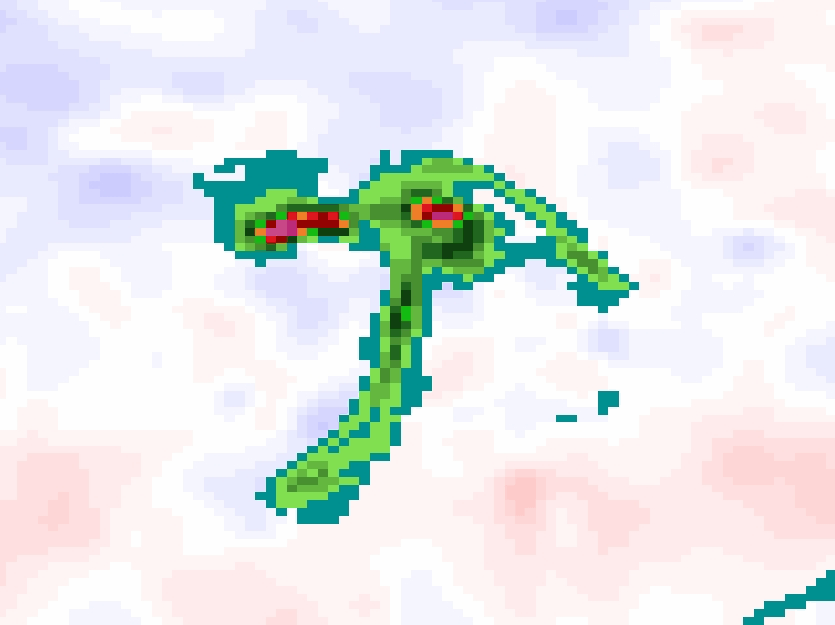

In [13]:
%makeMovie -caption Part_e

## Markdown answer for e): Is this field “large” in magnitude? Compared to what, and why is that the right comparison in light of these considerations? Does it have features that correspond to MERRA’s prectot? What is your assessment of the general quality of the model’s analysis and physics in depicting this storm?


This display corresponds to the errors that are left over as compensation when the combination of dynamical and physical tendencies don't quite match up with observed change in temperature with time. Therefore this field is small in comparison to both physical heating and dynamical tendency terms. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


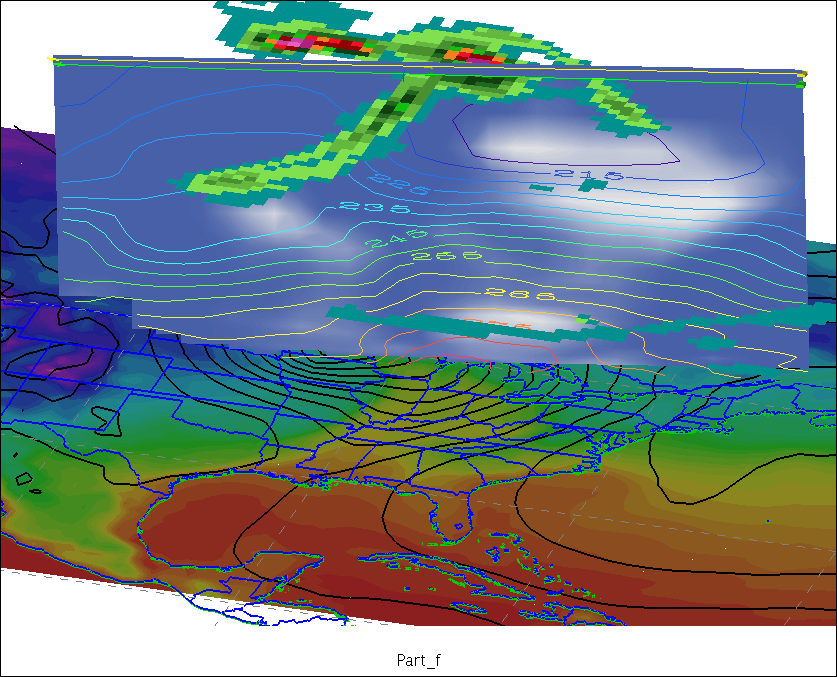

In [15]:
%makeImage -caption Part_f

## Markdown answer for f): Where in the cyclone do you see low, middle, and high cloudiness? Is the analysis generally trustworthy in its vertical structure?


The lowest clouds are visible to the northeast of the cyclone's center, with high clouds even further north than these and mid-level clouds appearing on the opposite side (northwest of the center). 

There is an upper level high trailing just west of the surface low, and associated with the mid-level clouds. A surface high is then present east of the upper level high and the surface low. This surface high is associated with the lowest clouds. The upper level low, east of the upper level high and the surface low, is associated with the highest cloud formation. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


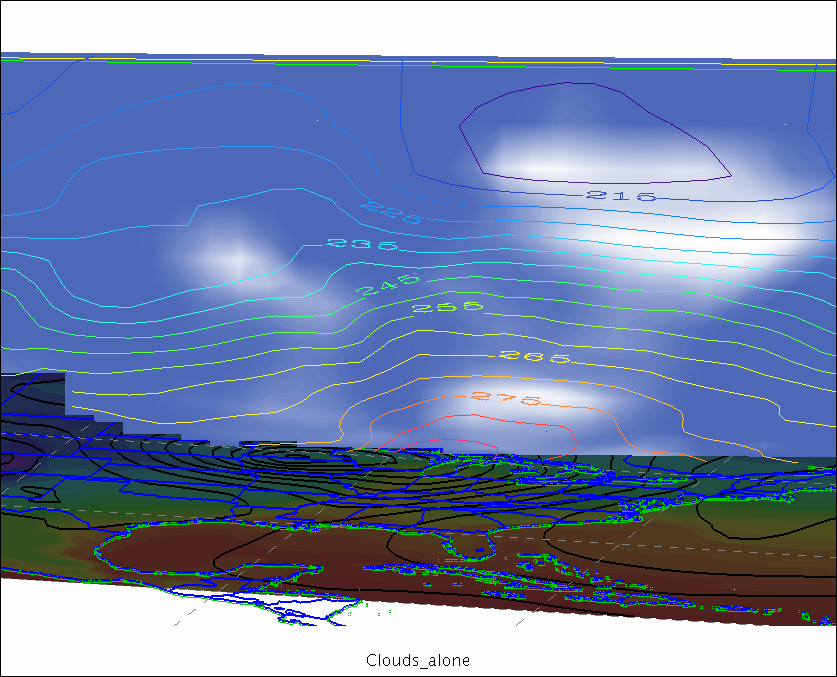

In [17]:
%makeImage -caption Clouds_alone

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


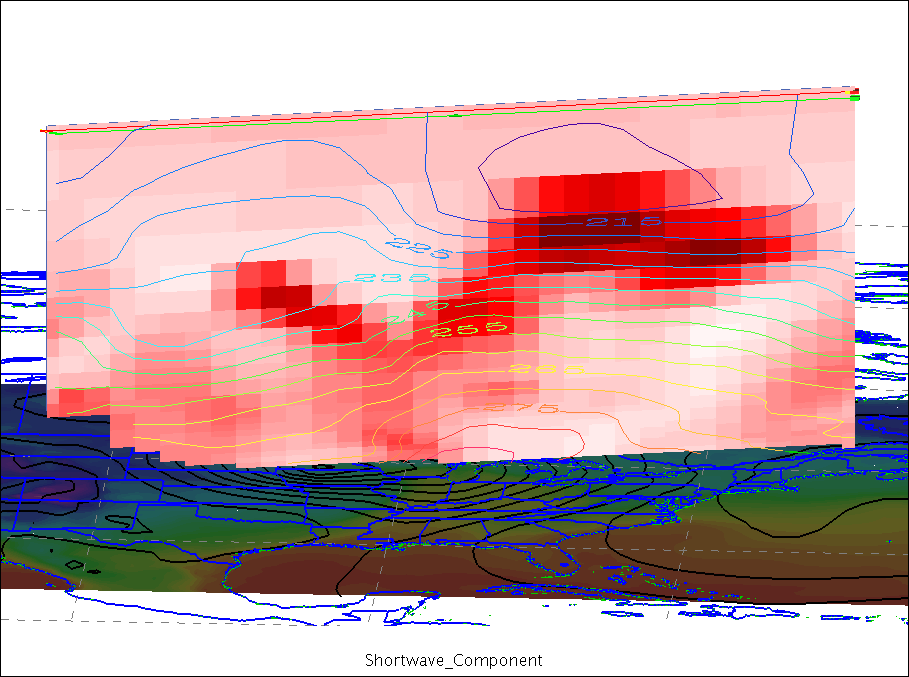

In [3]:
%makeImage -caption Shortwave_Component 

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


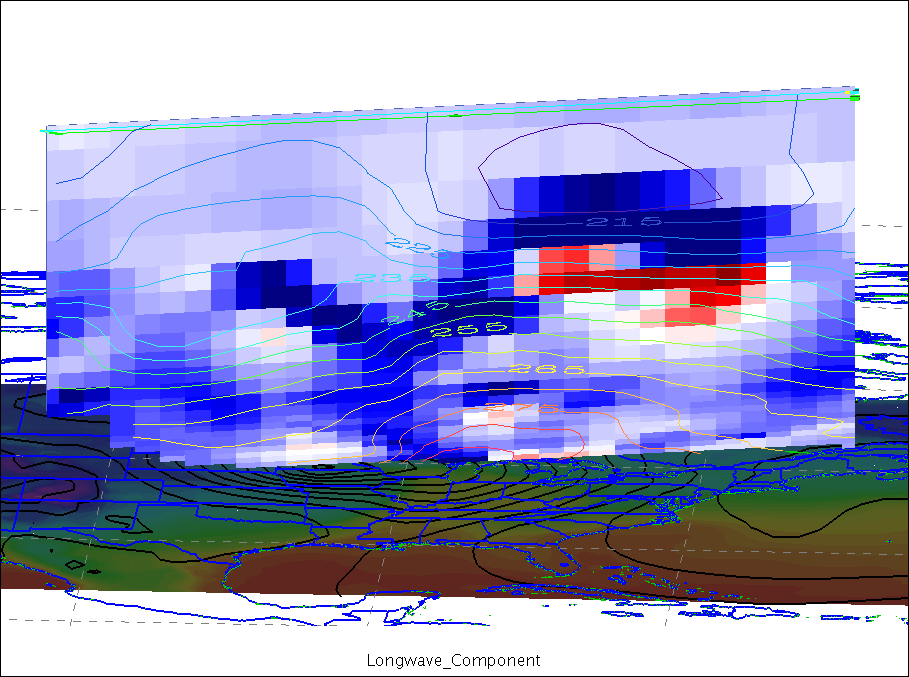

In [4]:
%makeImage -caption Longwave_Component 

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


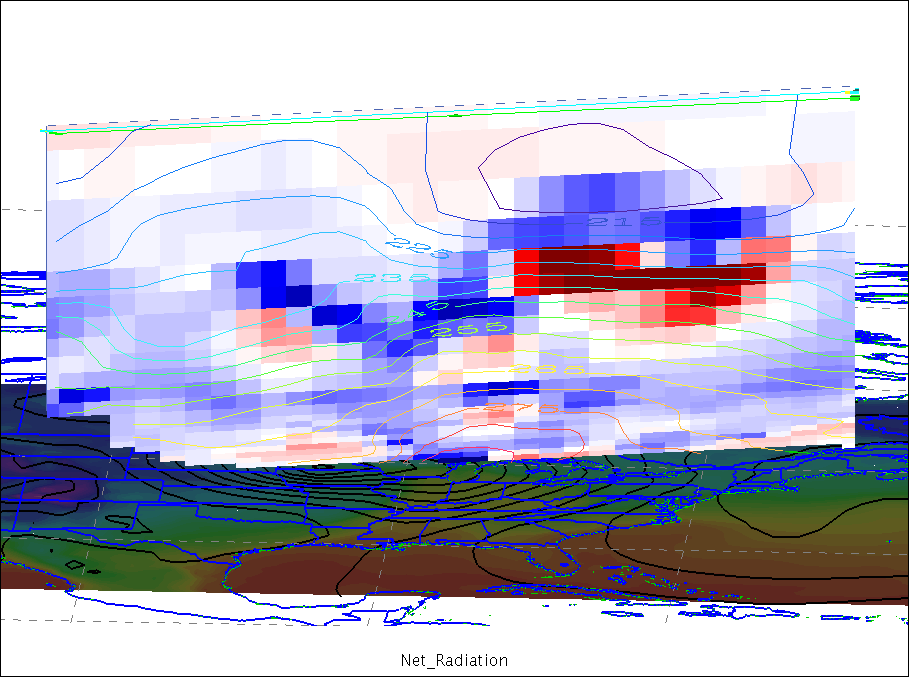

In [5]:
%makeImage -caption Net_Radiation

## Markdown answer for g): Can you see the expected pattern of 1) heating at cloud bases, and 2) cooling to space at cloud tops? Express the approximate magnitude of the heating in K per day, given that the displayed value is in K s−1. 
## Which is more similar to the net radiative heating, the shortwave or the longwave?


Heating at the cloud base can be seen for the upperlevel cloud, while cooling at cloud tops can be seen for all three evident cloud formations. 

Longwave radiation is negative at cloud tops, where more IR photons are leaving than arriving (as discussed above). This corresponds to the lowest negative values at cloud tops that can be seen in the image of only longwave. It is positive at cloud bases, where the opposite is occurring. This results in the strongest positive value below the upper level cloud. 

Heating from shortwave radiation is positive everywhere and strongest at cloud tops, which gets the most exposure to SW radiation from the sun. 

As can be seen from the net radiation, areas of strong longwave radiation dominate shortwave radiation. Overall, the longwave radiation profile is most similiar to the net radiation. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


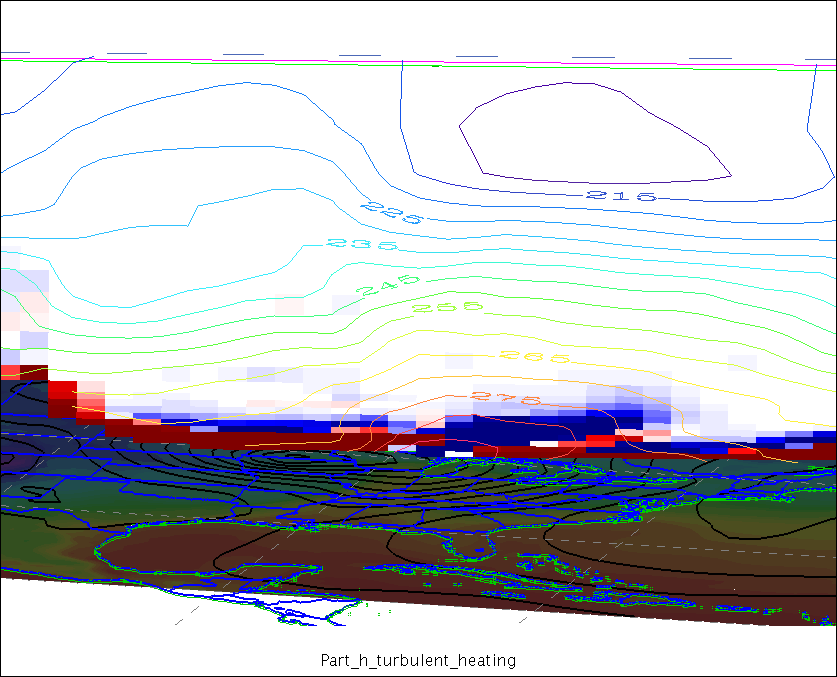

In [19]:
%makeImage -caption Part_h_turbulent_heating

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


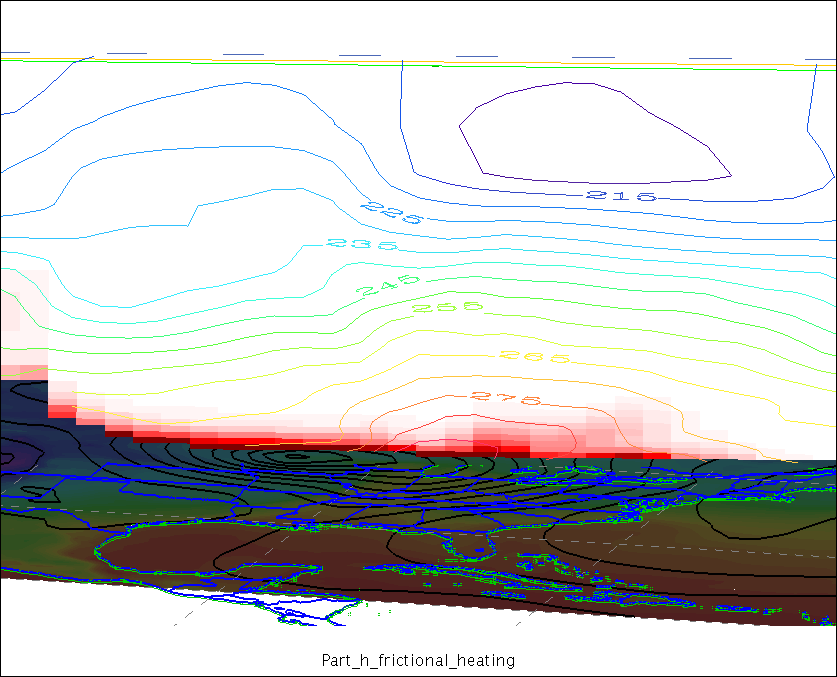

In [20]:
%makeImage -caption Part_h_frictional_heating

## Markdown answer for h): Where are they active? Why? About how big are their largest magnitudes in K day−1?


Turbulent heating and frictional heating are both present very near the surface, where interaction with topography is occurring. This makes sense because friction between air masses is the result of interaction between masses with different velocites. Topography forces air to move around it, creating changes in velocity and therefore differences between velocities of air masses with different distributions around a given surface feature. 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


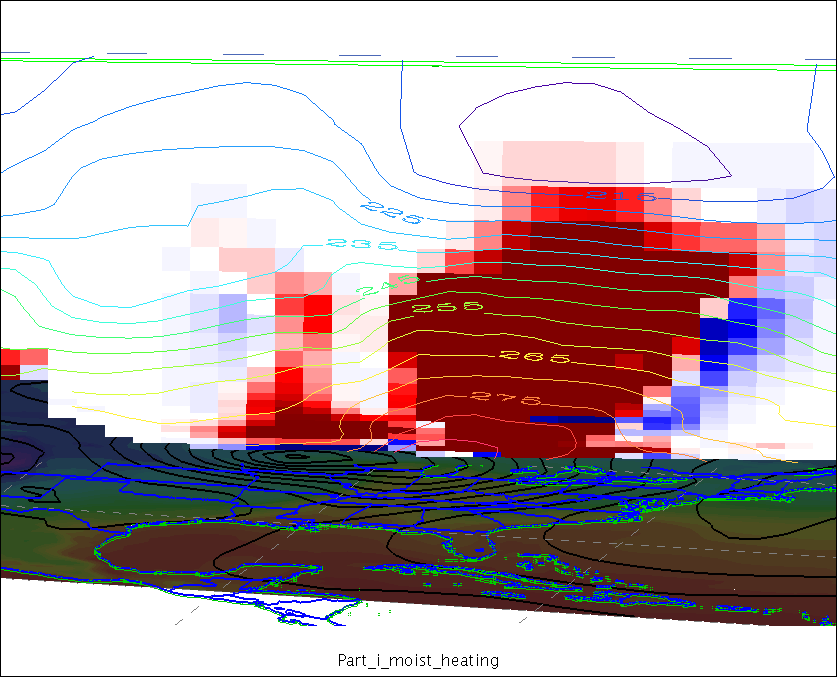

In [21]:
%makeImage -caption Part_i_moist_heating

## Markdown answer for i): How closely does dtdtmst correspond to the Cloudiness field? Where does dtdtmst have negative values? How can you understand those negative values in terms of moist processes (related to latent heat)?

The most extensive positive values occur below the highest cloud formation. This makes sense because the most condensation is occurring here resulting in large amounts of latent heat release. 

Physically, this is because heat is released from a system, in this case a parcel of air that is rising, in the transition from gas to liquid water. This would result in the heating of the environment seen above. 

Some negative values are on the eastern side of this large positive mass. This corresponds to the opposite physical process as above. In this area, ice is changing to water or water is changing to gas, so that energy must be supplied to the system and therefore the environment cools.  

<a href="#top">Top</a>
<hr style="height:2px;">

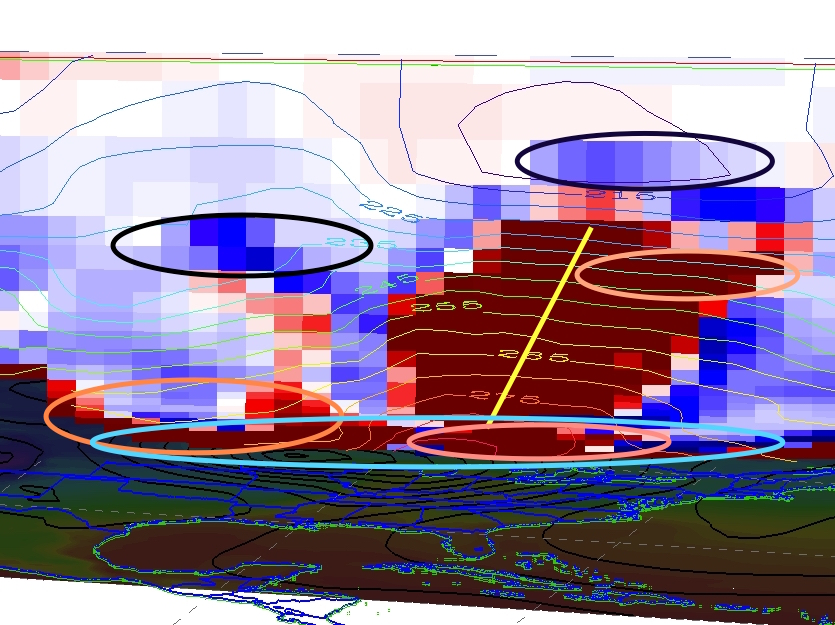

In [1]:
from IPython.display import Image
Image("image10nov14.jpg")

## Markdown answer for j): Capture an image, and annotate features on it which are contributed by 1) moist, 2) radiative, and 3) turbulent processes, synthesizing your findings above.

Variability at the surface is the result of turbulent processes (blue circle). Moist heating is occurring throughout the red mass extending in the vertical, as condensation and latent heat release are occurring here (yellow line). Red areas at the cloud bases indicate heating at the cloud base (radiative, orange circles), and blue areas at cloud tops indicate cooling there (radiative, black circles). Cooling above the lowest level cloud is overwhelmed by the moist heating above it extending to the high level cloud (yellow line). 

<a href="#top">Top</a>
<hr style="height:2px;">

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


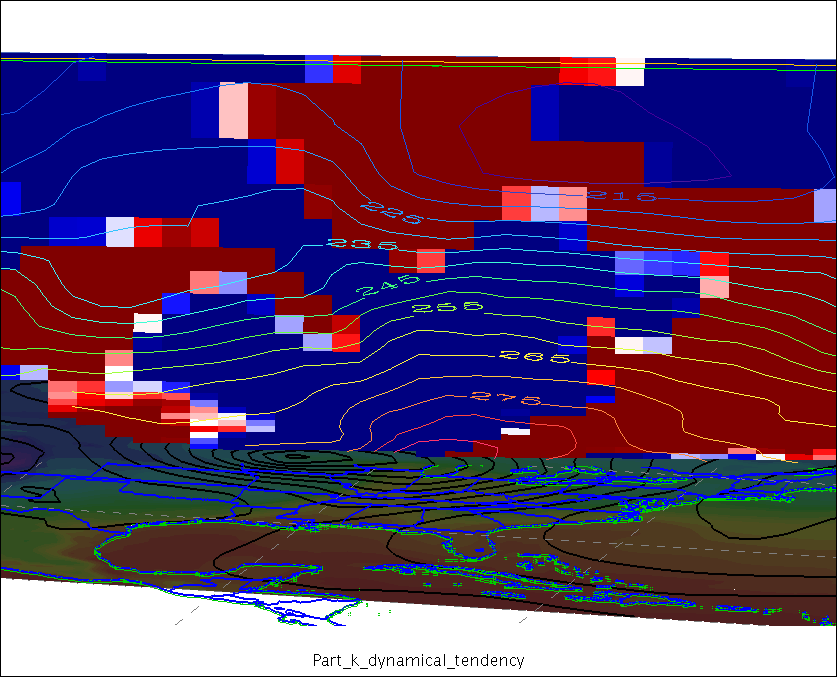

In [23]:
%makeImage -caption Part_k_dynamical_tendency

tempfile.tempdir = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'
tempfile.gettempdir() = '/var/folders/b2/pgfp11kx60b477n04zxs94y40000gn/T'


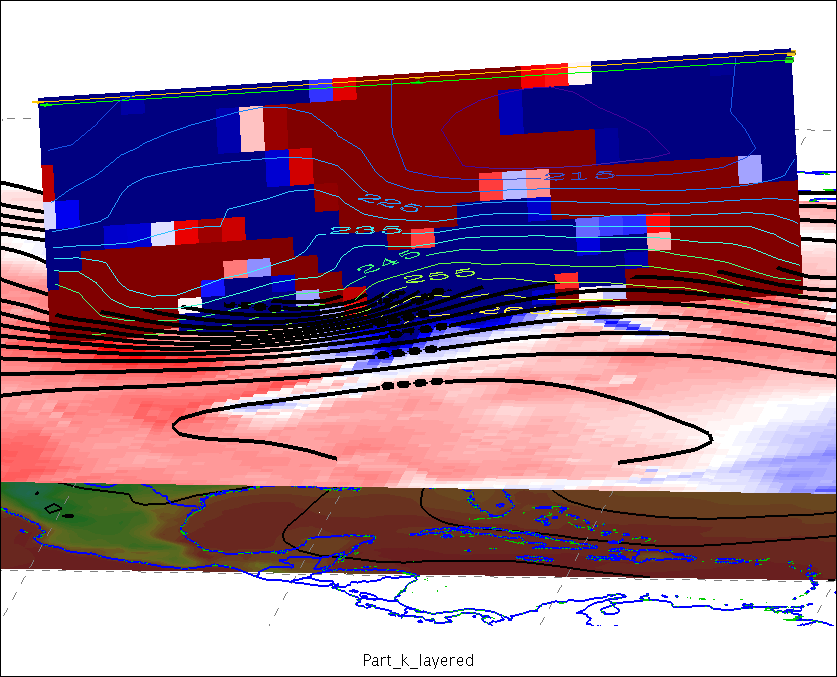

In [5]:
%makeImage -caption Part_k_layered 

## Markdown answer for k): Is the heat budget in this midlatitude cyclone primarily adiabatic?Show that the vertical integral over column mass is mainly contributed by the lower troposphere. 

The heat budget in this cyclone is largely diabatic, as heat exchange between different systems and the environment is largely responsible for the varying heating and cooling profiles described throughout these exercises. 

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Exercise4"></a> 
<div class="alert alert-success">
    <b>EXERCISE 4</b>:
     <ul>
          <li>**Choose a storm case of your own. ** Maybe you did this last week. Choose carefully: you will revisit this as a project and perhaps make a Wikipedia page about it. If you like, choose a new one at this point.
      </li>

      <li>**Do the second optional exercise (loading LMT_5.4_MERRA_1979-2015 and moving the time and space box) for your case.**
    
       <li>**Capture an image comparable to your favorite subsection above.**

      </li>
    </ul>
</div>

In [16]:
# To use this feature, the IDV display must have its ID set to this name, in Properties. 
%makeImage

ERROR:root:Line magic function `%makeImage` not found.


## My case: 

#### I decided to study a storm that occurred (date and time, place), because (background info). 

The image above shows ... 


In [ ]:
# Wikipedia image
from IPython.display import Image
Image("an image URL goes here")


<a href="#top">Top</a>
<hr style="height:2px;">

Upload your image to your GitHub area and put its URL into Blackboard. 

<a href="#top">Top</a>
<hr style="height:2px;">